In [1]:
import pickle
from gensim.models.wrappers import LdaMallet
from gensim.corpora.dictionary import Dictionary
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
os.chdir("/home/victor/unb/new_discursos/src")
lda = LdaMallet.load("data/models/lda_model_50_stem_it_2000/model")

In [5]:
texts_raw = pickle.load(open("data/discursos_raw_all.pickle", "rb"))

In [6]:
def clean_party(party):
    # normalize party names
    party_alias = {
        "DEM":              "PFL",
        "DEMOCRATAS":       "PFL",
        "PL":               "PR",
        "PRONA":            "PR",
        "PDC":              "PP",
        "PST":              "PP",
        "PTR":              "PP",
        "PRB":              "PP",
        "PPR":              "PP",
        "PPB":              "PP",
        "PROGRESSISTAS":    "PP",
        "PC DO B":          "PCdoB",
        "PODEMOS":          "PODE",
        "S/PARTIDO":        "S-PARTIDO",
        "S/Partido":        "S-PARTIDO",
    }

    if party in party_alias:
        return party_alias[party]

    return party

In [7]:
def sort_documents_by_party(texts_raw: [], party_threshold=750):
    # = {
    #  "PT":   [1, 4, 10, 3434],
    #  "PMDB": [2, 11, 534, 99]
    #   ...
    # }
    disc_by_party = {}

    for i, disc in enumerate(texts_raw):
        d = disc["IdentificacaoPronunciamento"]

        if 'SiglaPartidoParlamentarNaData' not in d:
            # empty_ids.append(i)
            continue

        else:
            party = d["SiglaPartidoParlamentarNaData"].strip()

            party = clean_party(party)

            if party not in disc_by_party:
                disc_by_party[party] = [i]
            else:
                disc_by_party[party].append(i)

    # only process parties with `party_threshold` docs or more
    disc_by_party_filtered = {
        k: v for k, v in disc_by_party.items() if len(v) >= party_threshold}

    return disc_by_party_filtered

In [8]:
lda_dt = lda.read_doctopics(lda.fdoctopics(), eps=0.01, renorm=True)

doc_topics = [
    x
    for x in lda_dt
]

In [9]:
docs_party = sort_documents_by_party(texts_raw)

In [10]:
sorted_doc_topics = [
    sorted(x, key=lambda x: x[1], reverse=True)[0]
    for x in doc_topics
]

In [10]:
sorted_doc_topics[900]

(48, 0.1510791366906475)

In [11]:
topic_map = {}

for party, _ in docs_party.items():
    for doc in docs_party[party]:
        topic, weight = sorted_doc_topics[doc]

        item = (doc, weight, party)

        if topic in topic_map:
            topic_map[topic].append(item)
        else:
            topic_map[topic] = [item]

    LIMIT = 20
    for key, _ in topic_map.items():
        topic_map[key] = sorted(topic_map[key], key=lambda x: x[1], reverse=True)[0:LIMIT]

In [16]:
topic_map[1]

[(10746, 0.5533980582524275, 'PT'),
 (15011, 0.5485074626865672, 'PT'),
 (41322, 0.5459183673469388, 'PSDB'),
 (67336, 0.5458553791887126, 'PT'),
 (20783, 0.5443548387096774, 'PT'),
 (54376, 0.5441389290882778, 'PT'),
 (29022, 0.5424164524421593, 'PSDB'),
 (23196, 0.5403817914831132, 'PT'),
 (30903, 0.5353260869565216, 'PT'),
 (17775, 0.5341614906832299, 'PCdoB'),
 (55855, 0.5338345864661654, 'PCdoB'),
 (56802, 0.5316742081447964, 'PSDB'),
 (68972, 0.5290697674418606, 'PT'),
 (21588, 0.5254237288135593, 'PT'),
 (27225, 0.5208333333333335, 'PT'),
 (34424, 0.5203488372093024, 'PSDB'),
 (73693, 0.517605633802817, 'PT'),
 (17603, 0.5168831168831168, 'PMDB'),
 (66443, 0.5163043478260869, 'PMDB'),
 (2795, 0.5148148148148148, 'PSDB')]

In [17]:
df = pd.DataFrame(columns=["Topic", "Party"])

for current_topic in range(lda.num_topics):
    for i, topic in enumerate(topic_map[current_topic]):
        doc, weight, party = topic
        # df = df.append(pd.Series([current_topic, doc, party, round(weight, 2)]), ignore_index=True)
        # df.loc[len(df)] = [current_topic, party]
        df = df.append({"Topic": current_topic, "Party": party}, ignore_index=True)

# df.columns = ['Topic', 'Document', 'Party', 'Weight']
# df.columns = ['Topic', 'Party']
    

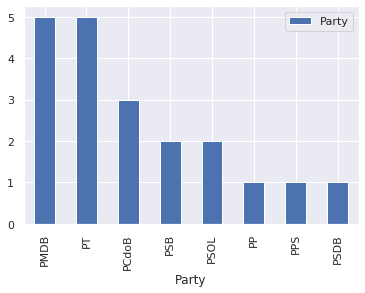

In [18]:
# x = df.groupby(['Topic', 'Party'])[['Topic', 'Party']].count()
# x['count'] =  df.groupby('Topic')['Party'].transform('count')
cf = df[df.Topic.eq(12)]
cf.groupby("Party")[["Party"]].count().nlargest(100, columns=["Party"]).plot(kind="bar")
# ax = df["Party"].value_counts().plot(kind='bar')
# ax.set_title("Topic {}"[.format(current_topic))
# ax.figure.savefig("results/party/topic_{}.png".format(current_topic))

/home/victor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


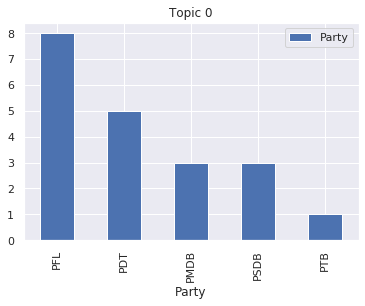

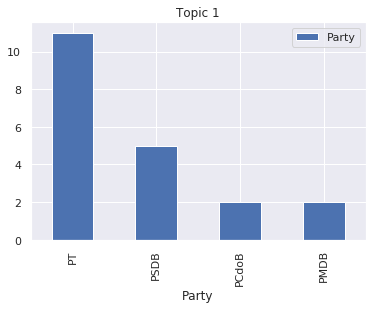

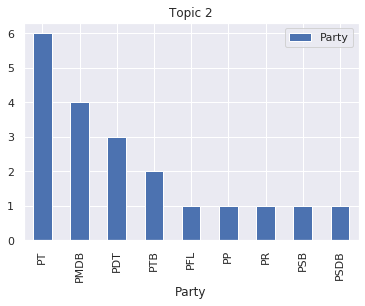

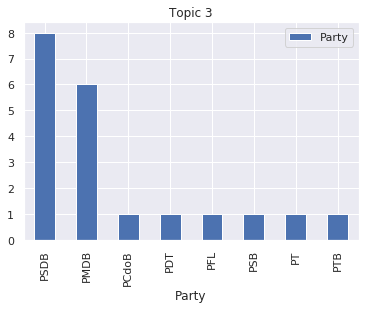

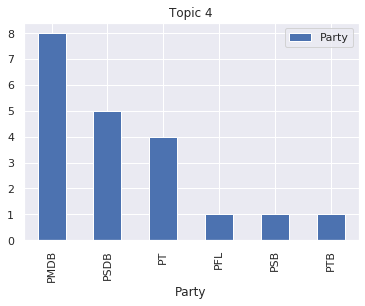

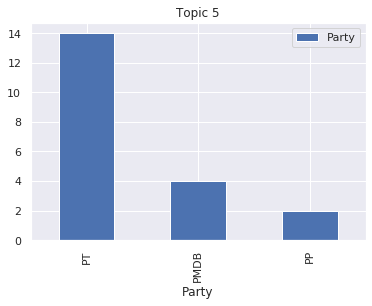

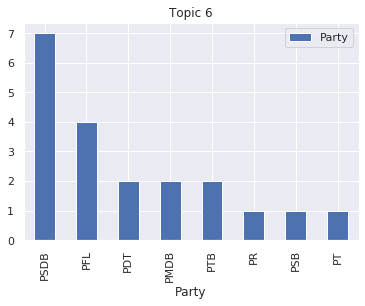

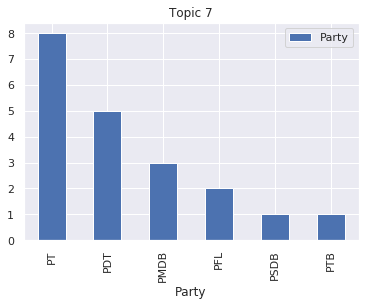

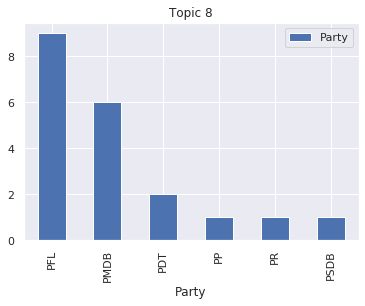

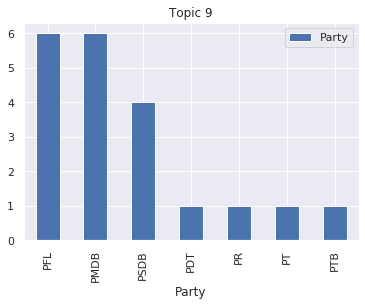

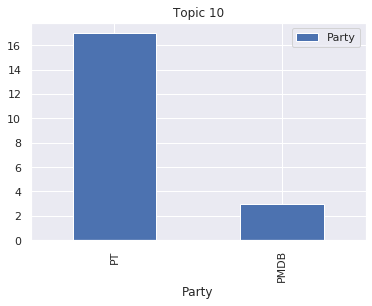

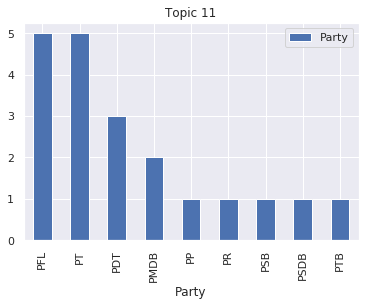

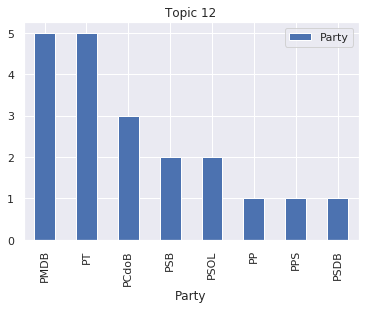

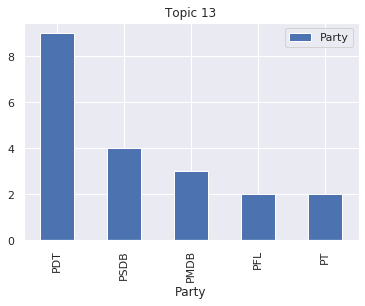

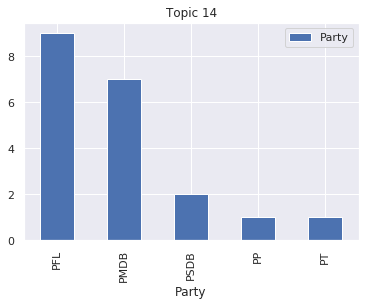

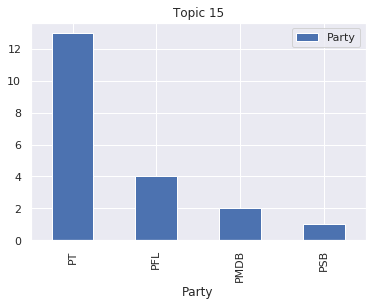

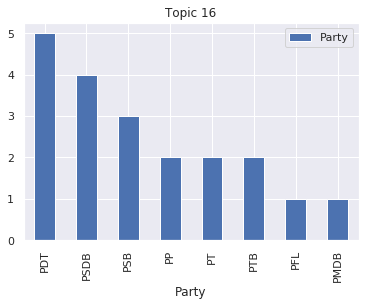

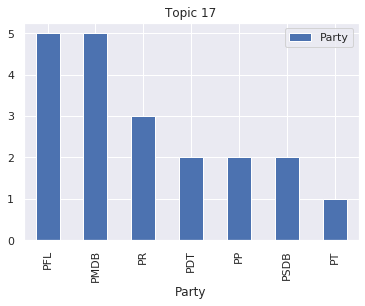

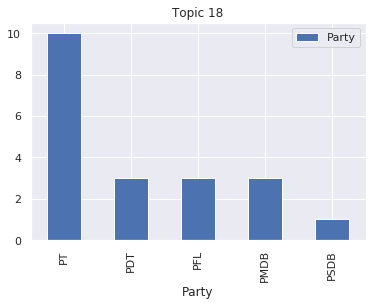

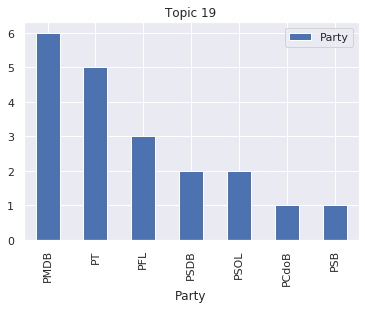

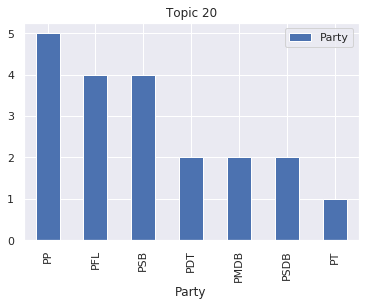

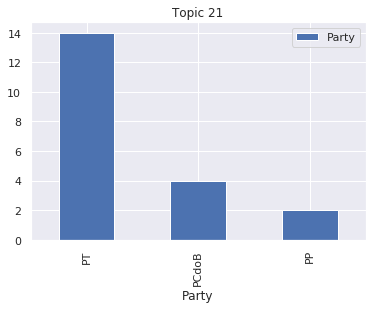

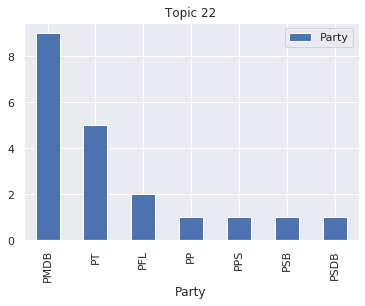

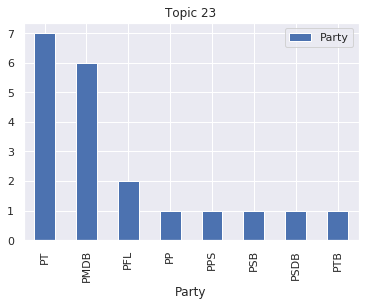

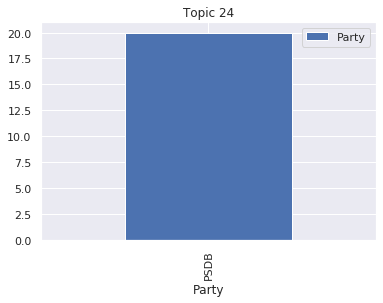

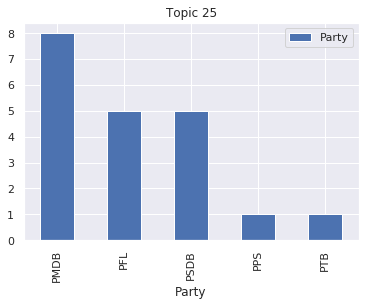

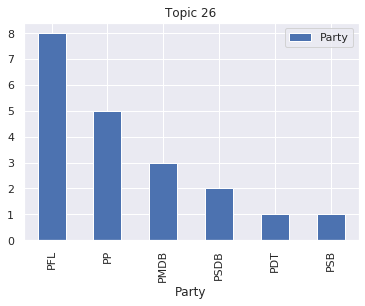

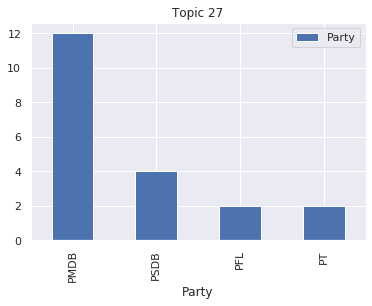

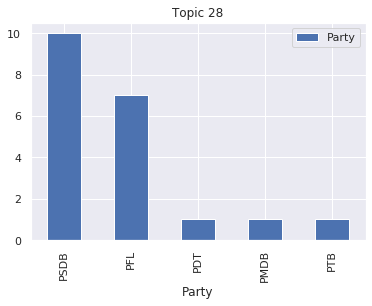

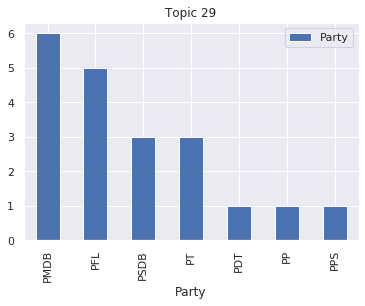

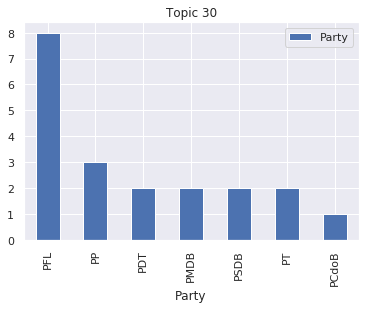

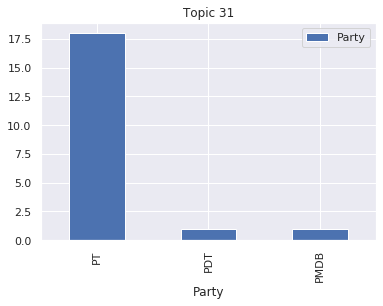

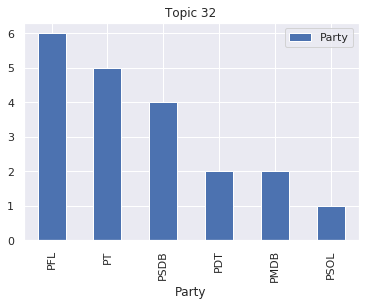

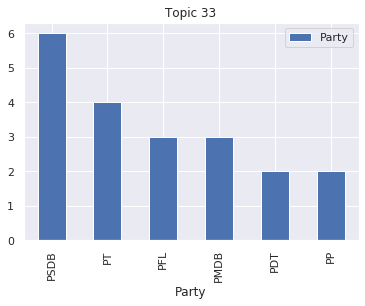

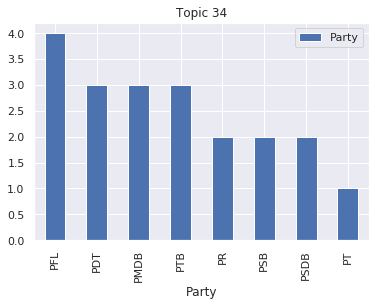

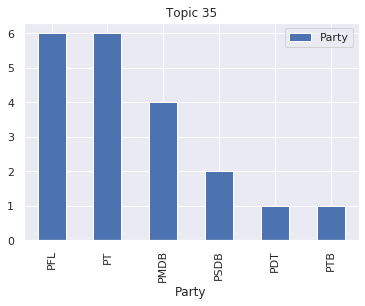

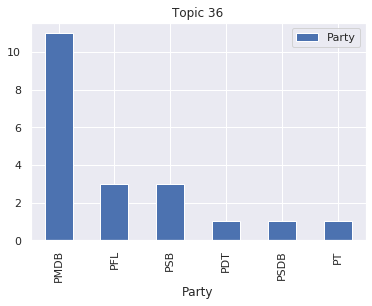

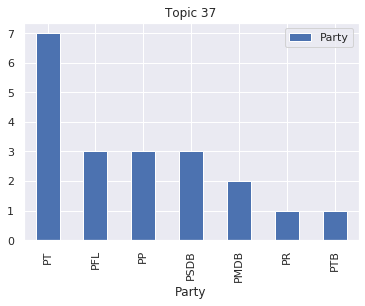

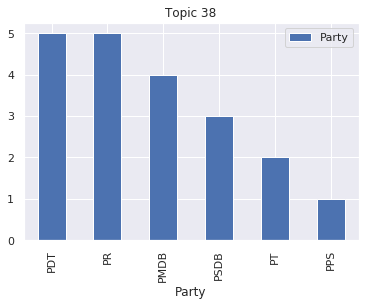

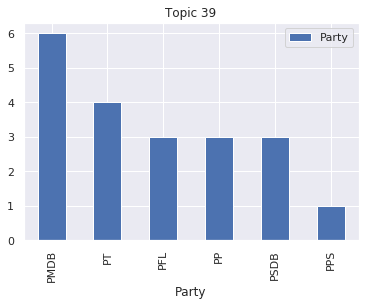

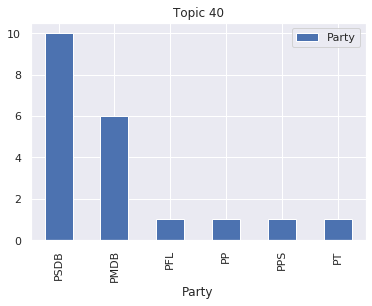

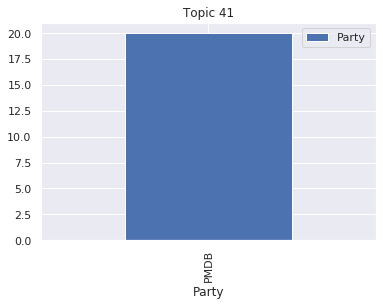

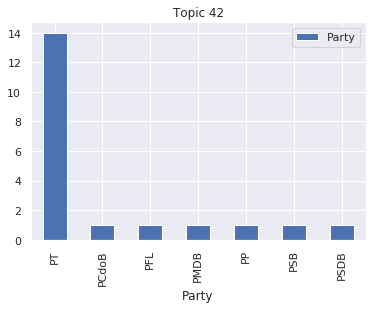

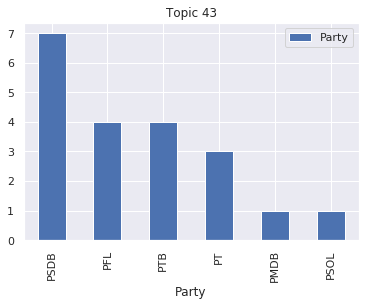

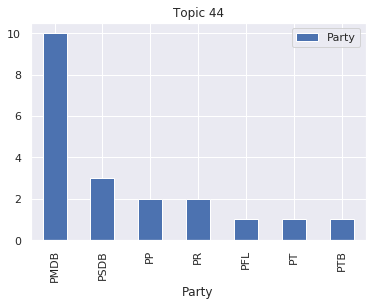

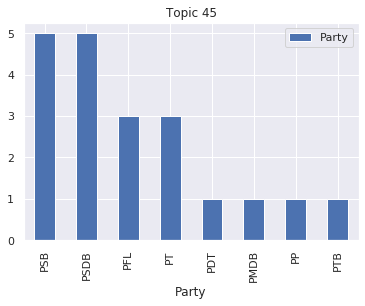

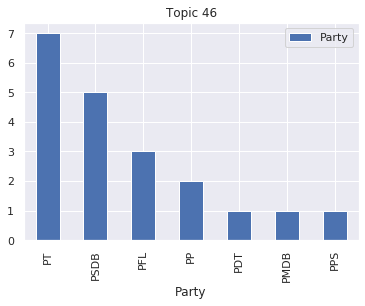

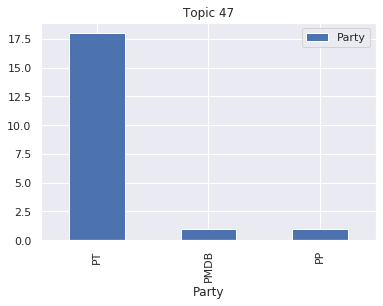

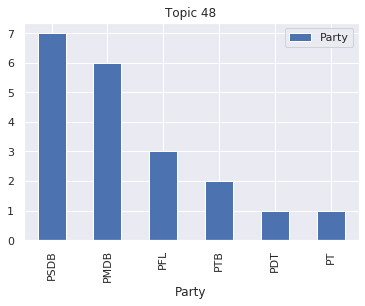

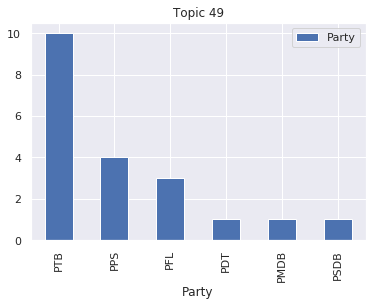

In [19]:
for topic in range(lda.num_topics):
    cf = df[df.Topic.eq(topic)]
    ax = cf.groupby("Party")[["Party"]].count().nlargest(100, columns=["Party"]).plot(kind="bar")
    # ax = df["Party"].value_counts().plot(kind='bar')
    ax.set_title("Topic {}".format(topic))
    ax.figure.savefig("results/party/topic_{}.png".format(topic))

In [50]:
 for i, topic in enumerate(topic_map[46]):
        doc, weight, party = topic
        df = df.append(pd.Series([doc, party, round(weight, 2)]), ignore_index=True)

Text(0.5, 1.0, 'Topic 46')

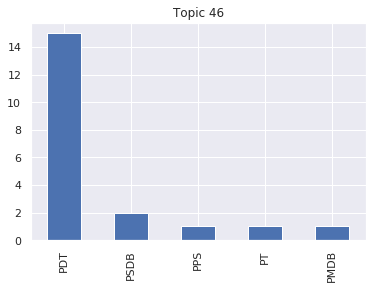

In [53]:
# df.columns = ['Document', 'Party', 'Weight']

ax =df["Party"].value_counts().plot(kind='bar')
ax.set_title("Topic {}".format(46))


In [48]:
lda.show_topic(0)

topics_df = pd.DataFrame()

for i in range(50):
    topic = lda.show_topic(i)
    words = " ".join([a[0] for a in topic])
    
    topics_df = topics_df.append(pd.Series([
        i,
        words
    ]), ignore_index=True)

topics_df.columns = ["Topic", "Words"]
topics_df


,Topic,Words
0,0.0,governo lula ministro oposicao republica pais ...
1,1.0,partido candidato voto politica eleitoral camp...
2,2.0,tribuna justica federal supremo processo direi...
3,3.0,governo dilma presidenta acre trabalho brasil ...
4,4.0,projeto comissao aprovado debate proposta apre...
5,5.0,piaui governo brasil deus homem anos verdade m...
6,6.0,estados imposto tributaria governo federal pag...
7,7.0,cidade federal capital parana brasil distritof...
8,8.0,realidade verdade capital modo capaz verdadeir...
9,9.0,ambiente ambiental floresta agraria amazonia n...
